In [130]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib

In [89]:
bike_train = pd.read_csv('/Users/drewbrinda/Desktop/train.csv')
bike_train.head()
# datetime - year-month-date hour
# season -  1: spring, 2: summer, 3: fall, 4: winter 
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy, 
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# atemp - temperature in Celsius
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals = casual + registered 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [90]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [91]:
bike_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [92]:
bike_train.isnull().sum() # Cheaking if any null values present in train data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [93]:
bike_test = pd.read_csv('/Users/drewbrinda/Desktop/test.csv')
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [94]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [95]:
bike_test.isnull().sum() # Cheaking if any null values present in train data

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [96]:
train_target = train['count']
train_feature = train.drop(['count'], axis=1)
train_target.shape, train_feature.shape

((10886,), (10886, 12))

In [97]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132,2011.501929,6.521495,9.992559,11.541613
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454,0.500019,3.444373,5.476608,6.915838
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000,2011.000000,4.000000,5.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000,2012.000000,7.000000,10.000000,12.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000,2012.000000,10.000000,15.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000,2012.000000,12.000000,19.000000,23.000000


In [98]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,2011.503619,6.565070,25.224550,11.555367
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,0.500025,3.429462,3.339411,6.912526
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,2011.000000,1.000000,20.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,2011.000000,4.000000,22.000000,6.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,2012.000000,7.000000,25.000000,12.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,2012.000000,10.000000,28.000000,18.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,2012.000000,12.000000,31.000000,23.000000


In [99]:
#calculate profit on given day
def Calculate_Profit(X):
    Casual_Customers = X['casual']
    Registered_Customers = X['registered']
    Registered_Price_Per_Hour = 5
    Casual_Price_Per_Hour = 20
    Taxes = 0.14
    Maintenance_Per_Hour = 1500 / (365 * 24) # we assume that the maintenance per year is 1500$, so we calc the maintenance per hour
    
    Profit_Per_Hour = (Registered_Customers * Registered_Price_Per_Hour) + (Casual_Customers * Casual_Price_Per_Hour)
    Profit_With_Taxes = Profit_Per_Hour - (Profit_Per_Hour * Taxes)
    Total_Profit = Profit_With_Taxes - Maintenance_Per_Hour
    return Total_Profit
bike_train['Profit'] = bike_train[["casual", "registered"]].apply(Calculate_Profit, axis=1)

In [100]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767


In [101]:
# first we need to convert the datetime coloumn to datetime format
bike_train["datetime"] = pd.to_datetime(bike_train["datetime"], format="%Y-%m-%d %H:%M:%S", errors='coerce')

# Now we can add the year,month,dat,... columns
bike_train["year"] = bike_train["datetime"].dt.year
bike_train["month_name"] = bike_train["datetime"].dt.month_name()
bike_train["month"] = bike_train["datetime"].dt.month
bike_train["day_of_week"] = bike_train["datetime"].dt.day_name()
bike_train["hour"] = bike_train["datetime"].dt.hour

In [102]:
bike_train.groupby('day_of_week').describe()['Profit'].transpose()
# results below we find that the Saturdays are the most profiable days

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,1250.484751,1203.496079,1666.252504,1513.401535,1157.893803,1112.073082,1100.526188
std,1110.019552,1129.727600,1772.625088,1571.404307,1086.029849,1065.481400,1111.243780
min,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767
25%,300.828767,249.228767,283.628767,287.928767,236.328767,210.528767,210.528767
50%,1036.128767,954.428767,956.578767,812.528767,911.428767,834.028767,791.028767
75%,1891.828767,1827.328767,2614.228767,2429.328767,1741.328767,1704.778767,1657.478767
max,5908.028767,5594.128767,7881.728767,7034.628767,5533.928767,6338.028767,5447.928767


In [103]:
#Get profit per Month
bike_train.groupby(['month_name']).describe()['Profit'].transpose()

month_name,April,August,December,February,January,July,June,March,May,November,October,September
count,909.000000,912.000000,912.000000,901.000000,884.000000,912.000000,912.000000,901.000000,912.000000,911.000000,911.000000,909.000000
mean,1356.722386,1655.357057,962.896750,605.952186,494.231482,1732.361004,1727.631947,995.696359,1527.469776,1191.646220,1518.257417,1656.591803
std,1458.515736,1377.196111,867.250141,627.333003,550.485928,1347.819769,1486.849128,1160.191715,1390.034599,1116.707532,1437.866293,1550.121938
min,4.128767,12.728767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,8.428767
25%,236.328767,461.003767,236.328767,137.428767,107.328767,557.753767,485.728767,150.328767,376.078767,315.878767,382.528767,373.928767
50%,868.428767,1433.878767,750.178767,425.528767,352.428767,1597.278767,1425.278767,640.528767,1264.028767,967.328767,1130.728767,1259.728767
75%,1969.228767,2385.253767,1440.328767,868.428767,671.703767,2600.253767,2575.528767,1393.028767,2142.303767,1687.578767,2203.578767,2390.628767
max,7344.228767,6497.128767,4480.428767,5099.628767,4213.828767,6187.528767,6849.728767,7679.628767,7795.728767,7034.628767,7864.528767,7881.728767


In [104]:
#number of bikes rented per day
bike_train.groupby('day_of_week').describe()['count'].transpose()

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,197.844343,190.390716,196.665404,180.839772,197.296201,189.723847,188.411348
std,172.518208,180.943376,180.917795,167.022145,187.606619,186.719673,190.942004
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,45.000000,43.000000,44.000000,36.000000,38.000000
50%,167.000000,146.000000,141.500000,119.000000,155.000000,146.000000,136.000000
75%,290.000000,277.500000,309.500000,298.000000,280.000000,274.000000,270.500000
max,900.000000,968.000000,783.000000,757.000000,901.000000,970.000000,977.000000


In [105]:
bike_train.groupby(['season', 'year']).describe()['Profit']
#season 1 refer to Spring, season 2 refer to Summer, season 3 refer to Fall, season 4 refer to winter

count         mean          std       min         25%  \
season year                                                           
1      2011  1323.0   442.546757   477.812349  4.128767   94.428767   
       2012  1363.0   949.740726  1043.429109  4.128767  206.228767   
2      2011  1367.0  1141.949030  1017.375400  4.128767  262.128767   
       2012  1366.0  1933.286307  1696.102108  4.128767  430.903767   
3      2011  1365.0  1390.181002  1164.994432  4.128767  382.528767   
       2012  1368.0  1972.108007  1596.803765  8.428767  527.653767   
4      2011  1367.0   971.097165   949.141246  4.128767  238.478767   
       2012  1367.0  1477.245227  1335.870271  4.128767  380.378767   

                     50%          75%          max  
season year                                         
1      2011   313.728767   629.778767  3564.528767  
       2012   666.328767  1334.978767  7679.628767  
2      2011   941.528767  1661.778767  4639.528767  
       2012  1668.228767  2848.578767  7795.728767  
3      2011  1190.928767  2042.328767  5060.928767  
       2012  1829.478767  2894.803767  7881.728767  
4      2011   748.028767  1319.928767  5658.628767  
       2012  1203.828767  2132.628767  7864.528767

In [106]:
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
bike_train.groupby('weather').describe()['Profit']

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,1402.328892,1381.640444,4.128767,287.928767,1014.628767,2055.228767,7864.528767
2,2834.0,1166.470052,1159.674508,4.128767,244.928767,825.428767,1745.628767,7881.728767
3,859.0,735.874634,925.977295,4.128767,124.528767,399.728767,956.578767,5542.528767
4,1.0,782.428767,NaN,782.428767,782.428767,782.428767,782.428767,782.428767


In [107]:
#rush hour function
def is_rush_hour(hour):
    if hour in [7,8,9,15,16,17]:
        return 1
    return 0
bike_train['is_rush_hour']= bike_train['hour'].apply(is_rush_hour)

In [108]:
bike_train.groupby('is_rush_hour').describe()['Profit'].transpose()

is_rush_hour,0,1
count,8153.000000,2733.000000
mean,1069.674358,1940.420498
std,1217.987206,1356.260623
min,4.128767,4.128767
25%,158.928767,937.228767
50%,644.828767,1689.728767
75%,1547.828767,2622.828767
max,7864.528767,7881.728767


In [109]:
##Data Vizualizations

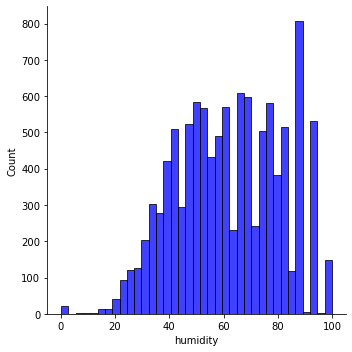

In [110]:
sns.displot(bike_train['humidity'], kde=False, color='b')

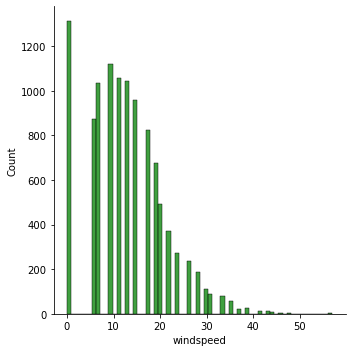

In [111]:
sns.displot(bike_train['windspeed'], kde=False, color='g')

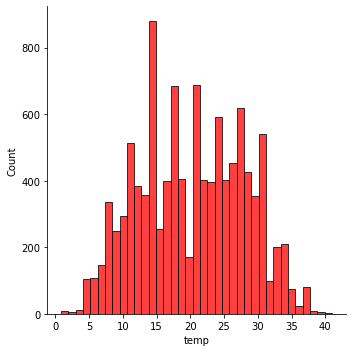

In [112]:
sns.displot(bike_train['temp'], kde=False, color= 'r')

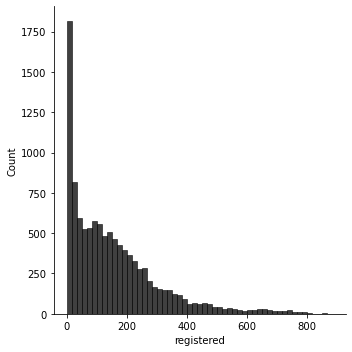

In [113]:
sns.displot(bike_train['registered'], kde=False, color='k')

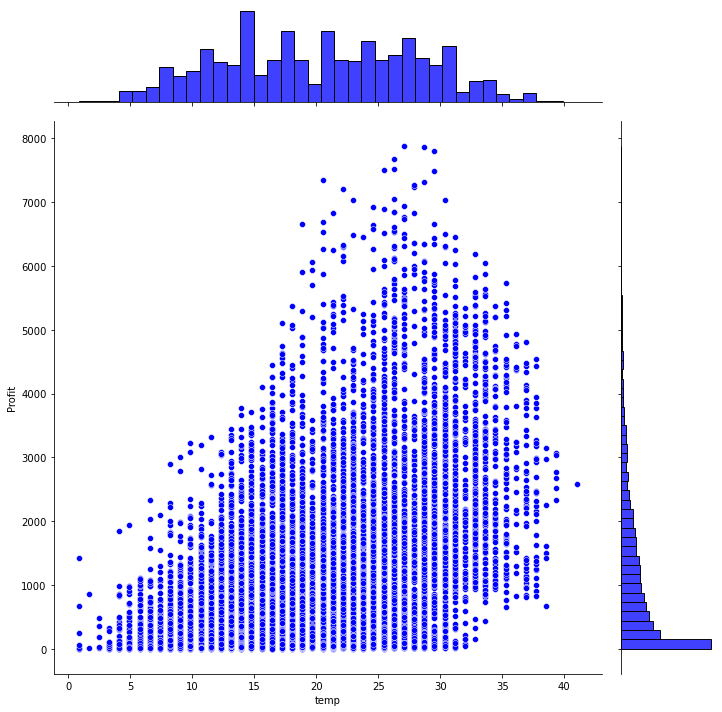

In [114]:
sns.jointplot(x='temp', y='Profit', color='b', height=10, data=bike_train, )

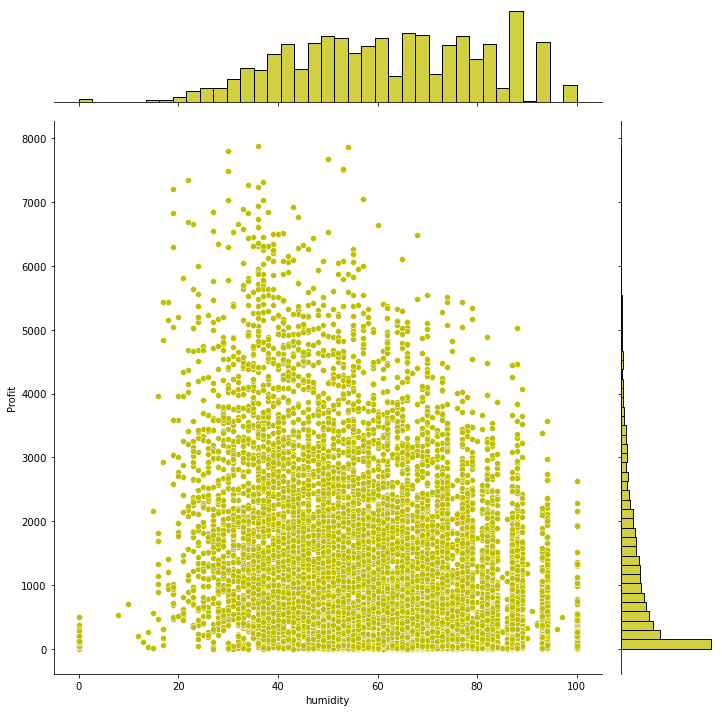

In [115]:
sns.jointplot(x='humidity', y='Profit', color='y', height=10, data=bike_train)

<AxesSubplot:xlabel='season', ylabel='count'>

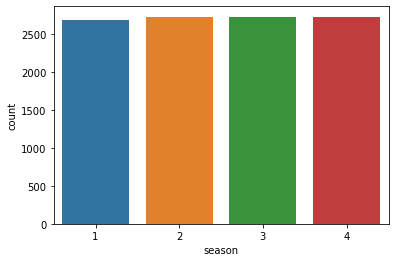

In [116]:
sns.countplot(x='season', data=bike_train)

<AxesSubplot:xlabel='season', ylabel='Profit'>

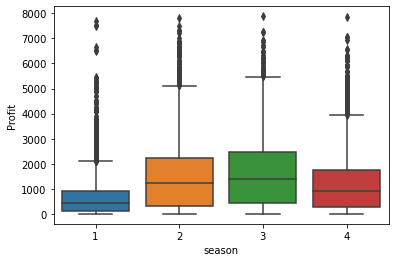

In [117]:
#season 1 refer to Spring, season 2 refer to Summer, season 3 refer to Fall, season 4 refer to winter
sns.boxplot(x='season', y='Profit', data=bike_train)

<AxesSubplot:xlabel='holiday', ylabel='Profit'>

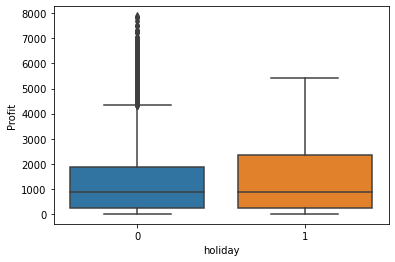

In [118]:
sns.boxplot(x='holiday', y='Profit', data=bike_train)

<AxesSubplot:xlabel='workingday', ylabel='Profit'>

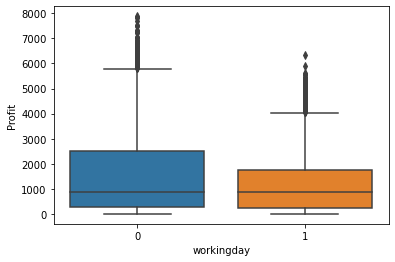

In [119]:
sns.boxplot(x='workingday', y='Profit', data=bike_train)

<AxesSubplot:xlabel='weather', ylabel='Profit'>

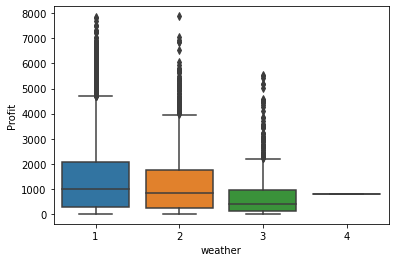

In [120]:
sns.boxplot(x='weather', y='Profit', data=bike_train)

<AxesSubplot:xlabel='day_of_week', ylabel='Profit'>

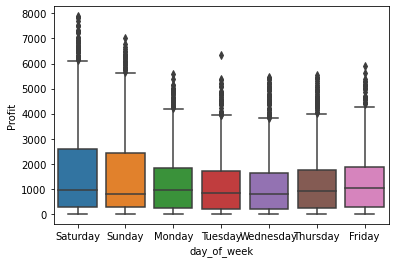

In [121]:
sns.boxplot(x='day_of_week', y='Profit', data=bike_train)

<AxesSubplot:xlabel='hour', ylabel='Profit'>

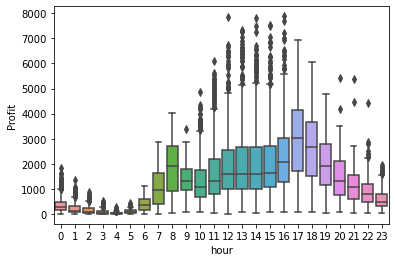

In [122]:
sns.boxplot(x='hour', y='Profit', data=bike_train)

In [123]:
bike_train = bike_train[['season', 'holiday', 'workingday', 'weather', 'temp','humidity','count', 'month', 'day_of_week', 'hour']]


In [124]:
bike_train = pd.get_dummies(bike_train, columns=['season', 'weather', 'day_of_week'])

In [125]:
Train_Bikes_Features = bike_train.drop('count', axis=1)
Train_Bikes_Label = bike_train['count']

In [126]:
Train_Bikes_Features.head()

,holiday,workingday,temp,humidity,month,hour,season_1,season_2,season_3,season_4,...,weather_2,weather_3,weather_4,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0,0,9.84,81,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,9.02,80,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,9.02,80,1,2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,9.84,75,1,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,9.84,75,1,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
#Splitting Dataset
Train_Bikes, Validate_Bikes, Train_Label, Validate_Label= train_test_split(Train_Bikes_Features, Train_Bikes_Label, test_size=0.05)



In [131]:
Scaler = StandardScaler()
Scaler.fit(Train_Bikes)
Train_Bikes = Scaler.transform(Train_Bikes)
Validate_Bikes = Scaler.transform(Validate_Bikes)

In [133]:
#Build and Train Different Machine Learning Models
Models = {
    "LR":LinearRegression(),
    "KNNR":KNeighborsRegressor(),
    "SVR":SVR(),
    "DT":DecisionTreeRegressor(),
    "RF":RandomForestRegressor(n_estimators=625),
    "GBR":GradientBoostingRegressor(n_estimators=4000,alpha=0.01),
    "XGBR":XGBRegressor(n_estimators=550), 
}

for name, model in Models.items():
    print(f"Using Model: {name}" )
    model.fit(Train_Bikes, Train_Label)
    print(f'Training Score: {model.score(Train_Bikes, Train_Label)}')
    print(f'Test Score: {model.score(Validate_Bikes, Validate_Label)}')
    Validate_Predictions = model.predict(Validate_Bikes)
    print(f'RMSE: {mean_squared_error(Validate_Label, Validate_Predictions, squared=False)}')
    print('-'*45)
    joblib.dump(model, name+'.h5')

joblib.dump(Scaler, 'Scaler.h5')

Using Model: LR
Training Score: 0.3446985098528099
Test Score: 0.4004960575494365
RMSE: 144.61259709081014
---------------------------------------------
Using Model: KNNR
Training Score: 0.8026521655216177
Test Score: 0.7354731514148235
RMSE: 96.06053099311339
---------------------------------------------
Using Model: SVR
Training Score: 0.25652348682677373
Test Score: 0.2841482680347125
RMSE: 158.02348813022527
---------------------------------------------
Using Model: DT
Training Score: 0.9991163961365426
Test Score: 0.7711368129160885
RMSE: 89.35072375119513
---------------------------------------------
Using Model: RF
Training Score: 0.9816501993019838
Test Score: 0.8782757693472666
RMSE: 65.16263281085611
---------------------------------------------
Using Model: GBR
Training Score: 0.9235743260106077
Test Score: 0.88772980553182
RMSE: 62.580977348890556
---------------------------------------------
Using Model: XGBR
Training Score: 0.988404618217061
Test Score: 0.8955326633659606

['Scaler.h5']

In [138]:
LR = joblib.load('/Users/drewbrinda/Desktop/LR.h5')
Test_Predictions = LR.predict(Train_Bikes)
print("Test", Test_Predictions)
# Make sure that all predictions above zero
for indx, pred in enumerate(Test_Predictions):
    if pred < 0:
        Test_Predictions[indx] = 0

Test [341.25092044  20.25092044 331.75092044 ... 390.75092044 239.75092044
 280.75092044]
